In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [2]:
from scipy.special import softmax
np.random.seed(seed=13)

# The number of data samples
N = 1000
K = 3
pis = softmax(np.random.randn(K))

# Dimension
D = 2

'''
Dataset Preparation
'''
X = None
realN = 0
for k in range(3):
    # Data samples, Design Matrix
    X_new = np.random.randn(int(N * pis[k]), D)
    realN += len(X_new)

    # affine transform
    W = np.array(np.random.randn(D, D))
    b = np.random.randn(2) * 5
    X_new = X_new @ W + b
    
    if X is None:
        X = X_new
    else:
        X = np.concatenate([X, X_new], axis=0)

N = realN

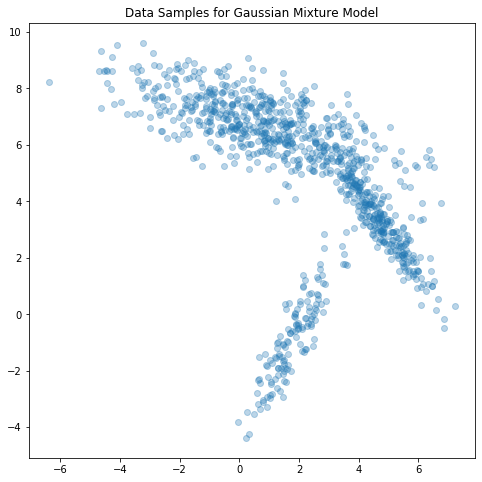

In [3]:
plt.figure(figsize=[8, 8])
plt.title('Data Samples for Gaussian Mixture Model')
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.show()

### Expectation & Maximization

In [4]:
def E_step(X, pis, means, covs):
    # X: [N, D]
    # pis: [K]
    # means: [K, D]
    # covs: [K, D, D]
    
    Z = np.zeros([N, K])
    for k in range(K):
        Z[:, k] = pis[k] * multivariate_normal.pdf(X, mean=means[k], cov=covs[k])
    Z = Z / np.sum(Z, axis=1, keepdims=True)
    
    Z = np.maximum(Z, 1e-9)
    return Z
            
def M_step(X, Z):
    # X: [N, D]
    # Z: [N, K]
    
    Nk = np.sum(Z, axis=0)
    covs = np.zeros([K, D, D])
    for k in range(K):
        pis[k] = Nk[k] / N
        means[k] = np.sum(Z[:, k][:, None] * X, axis=0) / Nk[k]        
        
        # [N, D]
        A = X - means[k]
        covs[k] = ((Z[:, k] * A.T) @ A) / Nk[k]
        
    return pis, means, covs

### Initial Parameters

Initial Parameters

components 0
pi[0] :0.3333333333333333
mean[0] :[ 1.62434536 -0.61175641]
covariance matrix[0] :
[[1. 0.]
 [0. 1.]]

components 1
pi[1] :0.3333333333333333
mean[1] :[-0.52817175 -1.07296862]
covariance matrix[1] :
[[1. 0.]
 [0. 1.]]

components 2
pi[2] :0.3333333333333333
mean[2] :[ 0.86540763 -2.3015387 ]
covariance matrix[2] :
[[1. 0.]
 [0. 1.]]



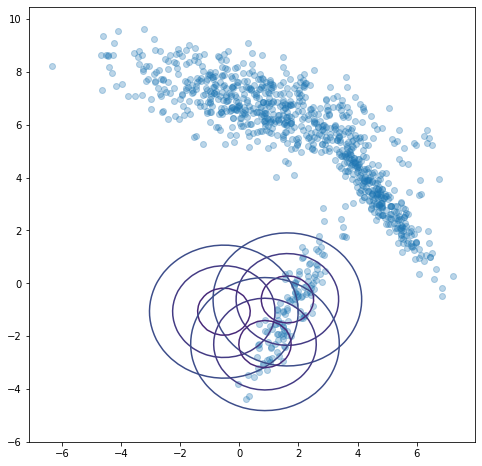

In [5]:
np.random.seed(seed=1)

K = 3

pis = np.ones(K) / K
means = np.random.randn(K, D)
covs = np.array([np.eye(D) for _ in range(K)])
print('Initial Parameters\n')

for i in range(K):
    print('components', i)
    print('pi[' + str(i) + '] :' + str(pis[i]))
    print('mean[' + str(i) + '] :' + str(means[i]))
    print('covariance matrix[' + str(i) + '] :')
    print(covs[i])
    print()
    
'''
Plot Code Reference : https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html
'''

from scipy.stats import multivariate_normal
from matplotlib.colors import LogNorm

plt.figure(figsize=[8, 8])

for k in range(K):
    # display predicted scores by the model as a contour plot
    x = np.linspace(-6., 6.)
    y = np.linspace(-6., 3.)
    Xgrid, Ygrid = np.meshgrid(x, y)
    XX = np.array([Xgrid.ravel(), Ygrid.ravel()]).T
    x_cov = np.array([[1, 0], [0, 0.2]])
    Z = -multivariate_normal.logpdf(XX, mean=means[k], cov=covs[k])
    Z = Z.reshape(Xgrid.shape)
    CS = plt.contour(Xgrid, Ygrid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 0.7, 5))
    
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.show()

### EM algorithm operation

In [10]:
for step in range(10):
    print(step)
    Z = E_step(X, pis, means, covs)
    pis, means, covs = M_step(X, Z)

0
1
2
3
4
5
6
7
8
9


### Results

In [11]:
print(pis)
print(means)
print(covs)

[0.5660601  0.30273623 0.13120367]
[[ 3.50184387  4.8250573 ]
 [-0.82830937  7.14408821]
 [ 1.75334092 -0.9116386 ]]
[[[ 2.95746855 -2.7492071 ]
  [-2.7492071   3.64723235]]

 [[ 2.55695529 -0.88163871]
  [-0.88163871  0.83082173]]

 [[ 0.51752736  0.91878889]
  [ 0.91878889  2.10353012]]]


### Plot

In [12]:
def loglikelihood(x, pis, means, covs):
    likelihood = np.zeros(len(x))
    for k in range(K):
        likelihood += pis[k] * multivariate_normal.pdf(x, mean=means[k], cov=covs[k])
    return np.log(likelihood)

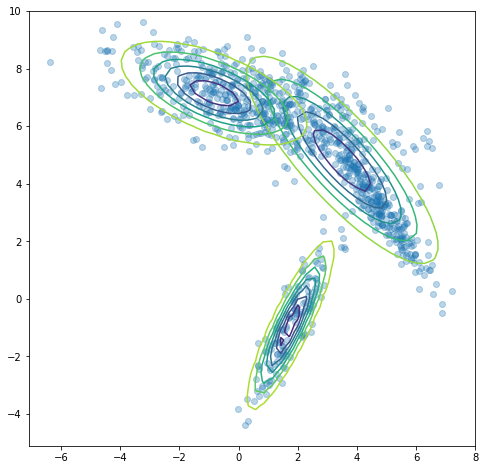

In [13]:
'''
Plot Code Reference : https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html
'''

from scipy.stats import multivariate_normal
from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
x = np.linspace(-6., 8.)
y = np.linspace(-4., 10.)
Xgrid, Ygrid = np.meshgrid(x, y)
XX = np.array([Xgrid.ravel(), Ygrid.ravel()]).T

plt.figure(figsize=[8, 8])

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
    
for k in range(K):
    Z = -multivariate_normal.pdf(XX, mean=means[k], cov=covs[k])
    Z = Z.reshape(Xgrid.shape)
    CS = plt.contour(Xgrid, Ygrid, Z)
    
plt.show()